In [17]:
library(ggplot2)
library(tidyverse)
daily_accidents <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-04-22/daily_accidents.csv')
daily_accidents_420 <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-04-22/daily_accidents_420.csv')

Rows: 9132 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): fatalities_count
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 9170 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): fatalities_count
lgl  (1): e420
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


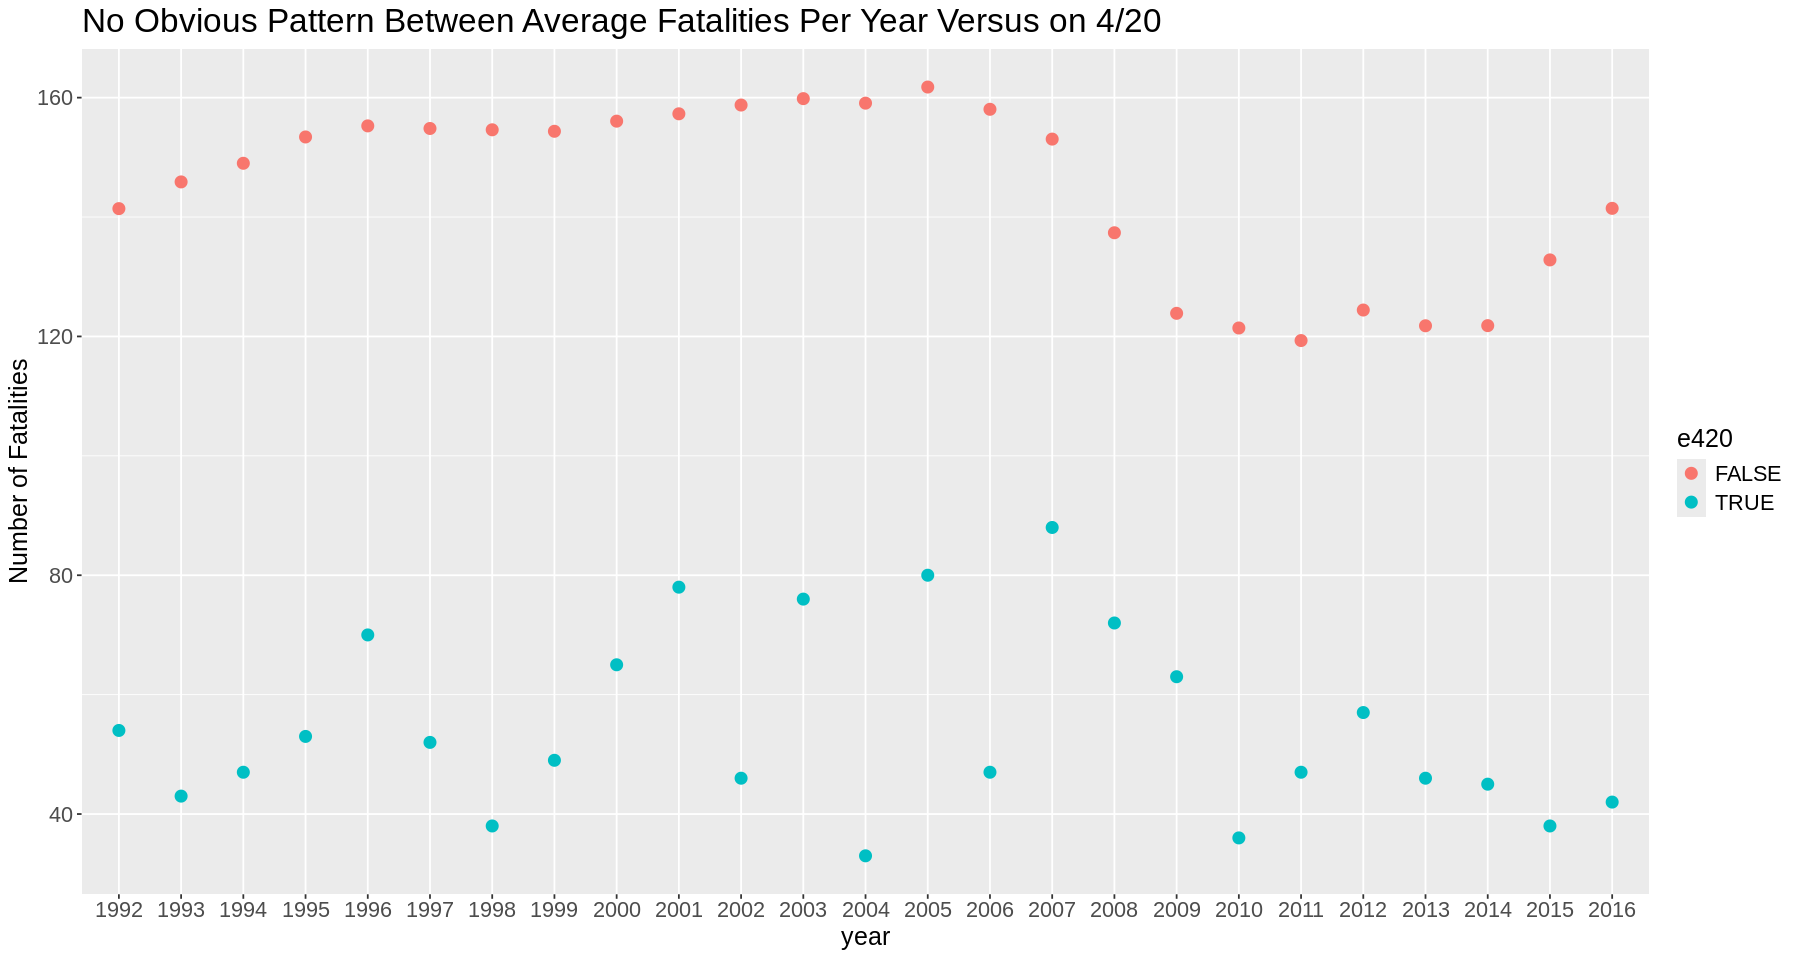

In [80]:
options(repr.plot.width = 15, repr.plot.height = 8)
yearly_count <- daily_accidents_420 |>
    filter(!e420 %in% NA) |>
    mutate(year = substr(date,1,4)) |>
    group_by(year) |>
    summarize(fatalities_count = mean(fatalities_count)) |>
    mutate(e420 = FALSE)


four_20 <- daily_accidents_420 |>
    mutate(year = substr(date,1,4)) |>
    filter(e420 == TRUE) |>
    select(!date)

avg_420 <- rbind(yearly_count,four_20) |>
    ggplot(aes(x = year, y = fatalities_count, color = e420)) +
    geom_point(size = 3) +
    labs(
        title = "No Obvious Pattern Between Average Fatalities Per Year Versus on 4/20",
        y = "Number of Fatalities"
    ) + 
    theme(plot.title = element_text(size = 20),
    axis.text = element_text(size = 13),
    axis.title = element_text(size = 15),
    legend.title = element_text(size=15),
    legend.text = element_text(size=13)
    )
avg_420